# Telco
Our Telco scenario continues:

As a customer analyst for Telco, **you want to know who has spent the most money with the company over their lifetime.** You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named **explore.ipynb**. In addition, you should create a file named **explore.py** that contains the following functions for exploring your variables (features & target).

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from env import get_db_url

In [2]:
url = get_db_url(db_name='telco_churn')

In [3]:
query = """
            SELECT customer_id, tenure, monthly_charges, total_charges, tech_support
            FROM customers
        """

In [4]:
df = pd.read_sql(query, url)
df.head(3)

,customer_id,tenure,monthly_charges,total_charges,tech_support
0,0002-ORFBO,9,65.6,593.3,Yes
1,0003-MKNFE,9,59.9,542.4,No
2,0004-TLHLJ,4,73.9,280.85,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7043 non-null   object 
 1   tenure           7043 non-null   int64  
 2   monthly_charges  7043 non-null   float64
 3   total_charges    7043 non-null   object 
 4   tech_support     7043 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 275.2+ KB


In [6]:
df.groupby('total_charges').total_charges.count()

total_charges
          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: total_charges, Length: 6531, dtype: int64

In [7]:
df[df.tenure == 0]

,customer_id,tenure,monthly_charges,total_charges,tech_support
945,1371-DWPAZ,0,56.05,,Yes
1731,2520-SGTTA,0,20.00,,No internet service
1906,2775-SEFEE,0,61.90,,Yes
2025,2923-ARZLG,0,19.70,,No internet service
2176,3115-CZMZD,0,20.25,,No internet service
2250,3213-VVOLG,0,25.35,,No internet service
2855,4075-WKNIU,0,73.35,,Yes
3052,4367-NUYAO,0,25.75,,No internet service
3118,4472-LVYGI,0,52.55,,Yes
4054,5709-LVOEQ,0,80.85,,No


In [8]:
print(df.shape)
df = df[df.tenure > 0]
print(df.shape)

(7043, 5)
(7032, 5)


In [9]:
df['total_charges'] = df.total_charges.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7032 non-null   object 
 1   tenure           7032 non-null   int64  
 2   monthly_charges  7032 non-null   float64
 3   total_charges    7032 non-null   float64
 4   tech_support     7032 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 329.6+ KB


1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [10]:
train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=0.2, random_state=123)

train.shape, validate.shape, test.shape

((4500, 5), (1125, 5), (1407, 5))

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [11]:
# def plot_variable_pairs(df):
#     sns.pairplot(train, kind="reg", plot_kws={'line_kws':{'color':'red'}})

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [12]:
# def months_to_years(df):
#     df['tenure_years'] = df.tenure / 12
#     df['tenure_years'] = df.tenure_years.astype('int64')
#     return df

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [13]:
cats = ['tech_support']
cat = 'tech_support'
conts = ['tenure', 'monthly_charges']

# def plot_categorical_and_continuous_vars(df, cats, conts):
#     for cat in cats:
#         print("| -----------------", cat, "----------------- |")
#         plt.hist(df[cat])
#         plt.show()
#         for cont in conts:
#             sns.boxplot(data=df, x=cat, y=cont)
#             plt.show()

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [14]:
import explore

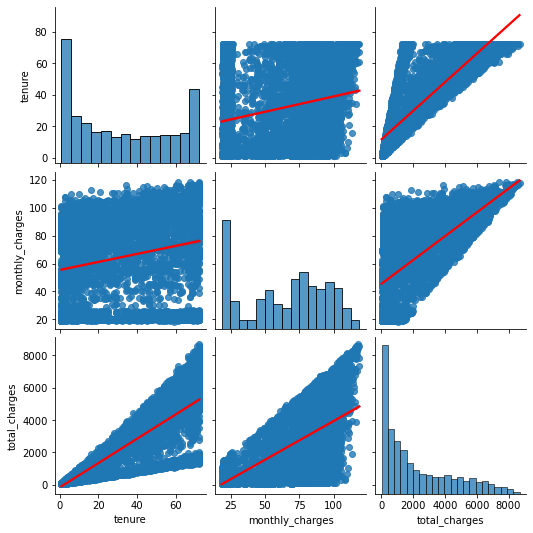

In [15]:
explore.plot_variable_pairs(train)

In [16]:
explore.months_to_years(train)

,customer_id,tenure,monthly_charges,total_charges,tech_support,tenure_years
3221,4619-EVPHY,20,91.00,1859.50,No,1
3076,4402-FTBXC,54,89.80,4667.00,No,4
4825,6789-HJBWG,12,49.40,611.65,No,1
5571,7851-FLGGQ,1,44.65,44.65,Yes,0
6967,9885-MFVSU,35,46.35,1662.05,Yes,2
...,...,...,...,...,...,...
3209,4598-ZADCK,53,53.60,2879.20,Yes,4
4256,5996-DAOQL,1,20.45,20.45,No internet service,0
2523,3606-TWKGI,13,106.90,1364.30,No,1
6241,8821-XNHVZ,1,80.05,80.05,No,0


| ----------------- tech_support ----------------- |


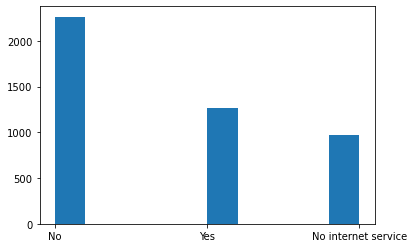

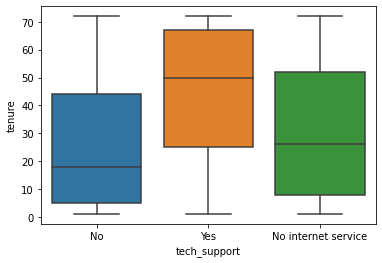

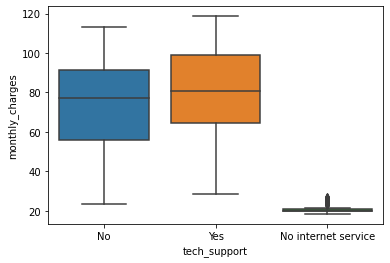

In [17]:
explore.plot_categorical_and_continuous_vars(train, cats, conts)

6. Explore your dataset with any other visualizations you think will be helpful.
    * If the problem is finding customers with highest lifetime costs, and with tenure and monthly_charges data, **you don't really need to use other visualizations** unless you want to find what is driving costs up and down (which is a different question).

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.
    * I will just use this notebook and rewrite all code to accomplish this task.

In [18]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

from sklearn.model_selection import train_test_split

import explore
import env

url = env.get_db_url(db_name='mall_customers')

In [19]:
query = 'SELECT * FROM customers'

In [20]:
df = pd.read_sql(query, url)
df.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df['customer_id'] = df['customer_id'].astype('object')

In [23]:
df.customer_id.value_counts().value_counts()

1    200
Name: customer_id, dtype: int64

In [24]:
train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=0.2, random_state=123)

train.shape, validate.shape, test.shape

((128, 5), (32, 5), (40, 5))

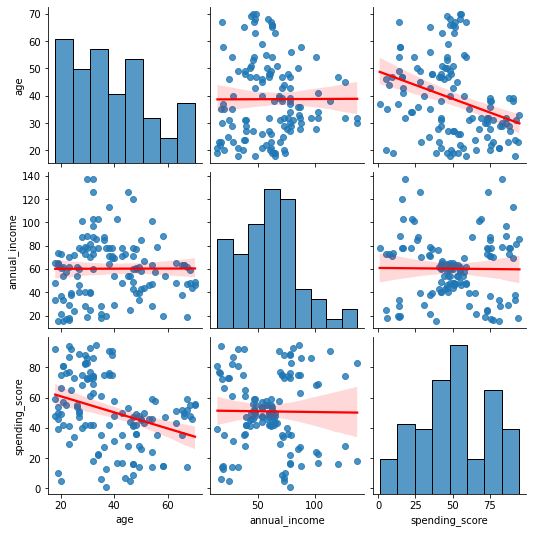

In [25]:
explore.plot_variable_pairs(train.drop(columns='customer_id'))

In [26]:
cats = ['gender']
conts = ['age', 'annual_income', 'spending_score']

| ----------------- gender ----------------- |


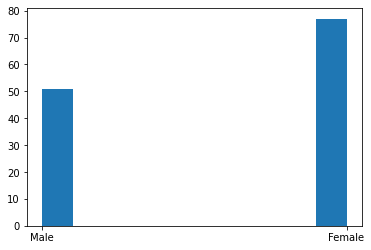

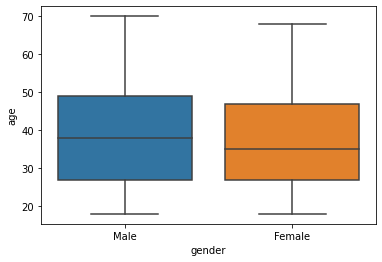

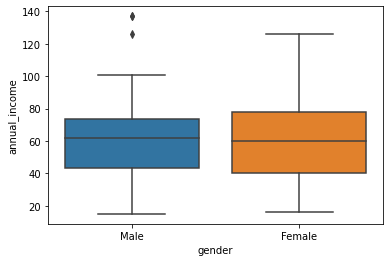

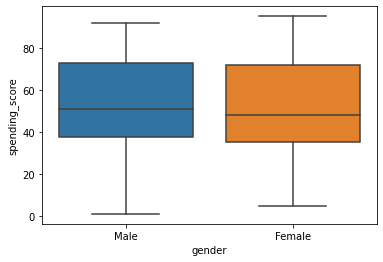

In [27]:
explore.plot_categorical_and_continuous_vars(train, cats, conts)

# Zillow
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to **predict the values of single unit properties using the observations from 2017.**

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [28]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy import stats

from wrangle import wrangle_zillow
import explore
import env

In [29]:
df = wrangle_zillow()
df.head(3)

,beds,baths,area,worth,built,tax,locality
7,3,2,2077,646760,1926,7924.68,06037
18,3,1,1244,169471,1950,2532.88,06037
19,3,2,1300,233266,1950,3110.99,06037


In [30]:
train_validate, test = train_test_split(df, test_size=0.15, random_state=123)
train, validate = train_test_split(train_validate, test_size=0.2, random_state=123)

train.shape, validate.shape, test.shape

((1217344, 7), (304337, 7), (268532, 7))

### 1. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

It would be fairly simple to plug the Zillow train dataset into my functions, however, doing so makes computing time prohibitively expensive. Instead of using my functions for the 1.2 million observations, I will do two things:
1. **Limit observations to 10% of my train dataset for exploration**
2. **Create visualizations as I go**

In [31]:
subset, d1 = train_test_split(train, train_size=0.1, random_state=123)
subset.shape

(121734, 7)

In [32]:
# for col in subset.columns:
#     if subset[col].dtype != "O":
#         plt.title(col)
#         subset[col].plot.hist()
#         plt.show()

NOTE: The above visualizations show **normal-ish distribution** on all numeric features in subset with some right skew (after reducing outliers via Inter-Quartile Rule)

### 2. Come up with some initial hypotheses based on your goal of predicting property value.
1. Increasing count of beds, baths, *or* area will increase property value.
2. Older homes have less value than newer homes
3. A locality will have different average property value than other localities

### 3. Visualize all combinations of variables in some way.

<AxesSubplot:>

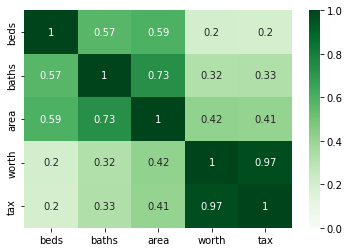

In [33]:
sns.heatmap(subset.corr(), cmap='Greens', annot=True, vmin=0, vmax=1)

### 4. Run the appropriate statistical tests where needed.

In [34]:
### Increasing count of beds, baths, or area will increase property value. ###
## Bivariate Exploration (check positive rate) ##
# explore.plot_variable_pairs(subset[['worth','beds','baths','area']]) -- good

## Statistical Tests ##
corr, p = stats.pearsonr(subset.worth, subset.beds) # (0.20003042023476011, 0.0)
corr, p = stats.pearsonr(subset.worth, subset.baths) # (0.3210488914950368, 0.0)
corr, p = stats.pearsonr(subset.worth, subset.area) # (0.41977708130943314, 0.0)

**Beds, Baths, and Area all have positive corr and 0.0 p-value to Worth, indicating statistical correlation.**

In [35]:
### Older homes have less value than newer homes. ###
## Create 'old' column splitting home age distribution in half ##
# subset.built.max() # -- Newest home in subset built in 2006
subset['age'] = 2006 - subset['built'].astype('int')
# subset['age'].plot.hist() # -- Normal distribution with kde near 40
subset['old'] = subset['age'] > 40

## Statistical Test ##
stats.mannwhitneyu(subset.worth, subset.old)

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

**Having a t-statistic of 0 and p-value of 0.0 here indicates no statistical difference between homes over 40 years old and homes under 40 years old.**

In [36]:
### A locality will have different average property value than other localities. ###
## Create masks for each locality ##
# subset.locality.unique() # -- localities are '06059', '06037', '06111'
mask1 = subset.locality == '06059'
mask2 = subset.locality == '06037'
mask3 = subset.locality == '06111'

## Check each locality against the total population ##
t, p = stats.ttest_1samp(subset[mask1].worth, subset.worth)
print(max(p))
t, p = stats.ttest_1samp(subset[mask2].worth, subset.worth)
print(max(p))
t, p = stats.ttest_1samp(subset[mask3].worth, subset.worth)
print(max(p))

0.9978228541158851
0.9946209473052449
0.9961794715655921


**P-value for each locality against the total population shows that there is not a statistical difference in property value between localities.**

### 5. What independent variables are correlated with the dependent variable, home value?

<AxesSubplot:>

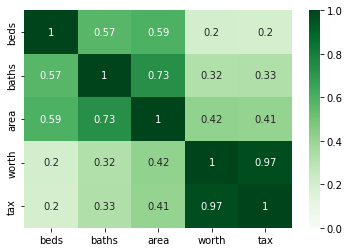

In [37]:
subset.drop(columns=['age','old'], inplace=True)
sns.heatmap(subset.corr(), cmap='Greens', annot=True, vmin=0, vmax=1)

### 6. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?
Please see above correlation heatmap.

### 7. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.